## Using Chicago Open Data Portal
download data Car Crahses

https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

* export button, save as a csv file.



##  Watch Videos

https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/



## Objective where the worst place to park in Chicago.
+ to learning basic sci kit learn preprocessing
+ learn k means clustering
+ to install run from command prompt 'pip install scikit-learn'
+ to learn standard data science work flow


In [1]:
# after you have downloaded data, load it into pytho
import pandas as pd 
file_path = 'data/Crimes_-_2018.csv'
data = pd.read_csv(file_path)
# if you are unsure where the file is
# import os
# os.listdir() # lists files in the working directory where python is.

In [2]:
# generally desribe the data
print(data.shape)
print(data.describe())
data.columns

(265402, 22)
                 ID           Beat       District           Ward  \
count  2.654020e+05  265402.000000  265402.000000  265399.000000   
mean   1.135041e+07    1142.180244      11.193186      23.438924   
std    5.377920e+05     696.050275       6.952397      14.094108   
min    2.375700e+04     111.000000       1.000000       1.000000   
25%    1.128595e+07     611.000000       6.000000      10.000000   
50%    1.137475e+07    1031.000000      10.000000      24.000000   
75%    1.146368e+07    1723.000000      17.000000      35.000000   
max    1.158322e+07    2535.000000      31.000000      50.000000   

       Community Area  X Coordinate  Y Coordinate      Year       Latitude  \
count   265400.000000  2.636480e+05  2.636480e+05  265402.0  263648.000000   
mean        36.469299  1.165008e+06  1.886592e+06    2018.0      41.844397   
std         21.453305  1.603621e+04  3.118503e+04       0.0       0.085756   
min          0.000000  1.092706e+06  1.813897e+06    2018.0   

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
# find what types of crime are in the dat set
set(data['Primary Type'])

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [5]:
# filter the data set down to only 

data_filtered = data.loc[data['Primary Type'] == 'MOTOR VEHICLE THEFT', ['X Coordinate','Y Coordinate']]
print(data.shape)
print(data_filtered.shape)

(265402, 22)
(9992, 2)


In [6]:
# Pr Process data for k means clustering
# remove or fill Null Values, in this case, and typically for Clustering, drop Null X ,y coorindates
# inplace = True means the data_filtered data frame it's self is updated
data_filtered.dropna(inplace=True)

In [7]:
# for a cluster model to work corretly, all variables need to be on the same scale. 
# in this care we will us
# https://sklearn.org/modules/generated/sklearn.preprocessing.StandardScaler.html
# this give our data mean 0 and standard deviation of 1 
from sklearn.preprocessing import StandardScaler 
s = StandardScaler()
data_scaled = s.fit_transform(data_filtered)

In [21]:
# to build the cluster model with k means, you need to import it from sklearn 
from sklearn.cluster import KMeans
n_clusters = 50
model =  KMeans(n_clusters=n_clusters)
model.fit(X=data_scaled)
cluster_dist = model.transform(data_scaled)
# output from transform represents distance to cluster
cluster_dist[0:2, :]

# Counter cluster loadings




array([[1.3423527 , 0.7861407 , 2.2989458 , 0.95060627, 1.05290555,
        3.02140133, 2.16845696, 0.76437676, 1.79579493, 0.33332104,
        0.96494624, 3.10778935, 1.58783677, 1.34214055, 0.58891138,
        2.91494203, 2.93059563, 1.83288224, 1.83445737, 0.63906148,
        2.21179436, 2.54029213, 1.39711102, 2.0007527 , 0.23712205,
        0.29442033, 2.6116155 , 1.22551391, 0.68028243, 1.78841771,
        0.49183148, 3.76226541, 0.97121585, 1.19716574, 2.53222978,
        0.99779349, 1.52041668, 0.8469677 , 2.85693324, 1.4824478 ,
        2.52489237, 3.24125804, 1.19849165, 1.39747088, 0.45931825,
        0.96108097, 1.85149207, 0.69642087, 2.07747987, 3.38001099],
       [1.95113834, 1.64311975, 0.65427564, 3.03239828, 2.85308939,
        1.4000258 , 0.1699213 , 1.43111722, 1.21985961, 2.52499969,
        2.65910384, 4.72071089, 0.70874674, 3.37328591, 2.04330349,
        0.89492771, 1.61759779, 1.94930921, 0.94588323, 2.55994259,
        1.36600396, 0.48946929, 0.86117192, 3.8

In [23]:
# get the closest cluster for each point in the data set
import numpy as np
clusters = np.argmin(cluster_dist, axis=1)
print(clusters[0:5])




[24  6  7 42 34]


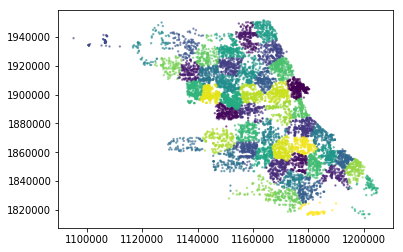

In [24]:
# it always a good idea to plot the clusters
from matplotlib import pyplot as plt
x = data_filtered['X Coordinate']
y = data_filtered['Y Coordinate']
colors = clusters
plt.figure()
plt.scatter(x, y,s =2, c=clusters, alpha=.5)


<BarContainer object of 50 artists>

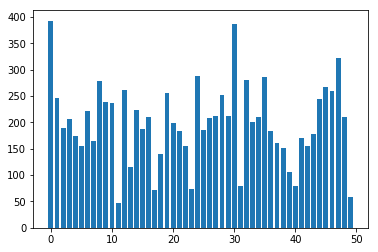

In [104]:
from collections import Counter
c = Counter(clusters)
h = list(c.values())
plt.bar(x=list(c.keys()), height=list(c.values()))

,0,1
0,0,0 24 dtype: int64
1,1,1 6 dtype: int64
2,2,2 7 dtype: int64
3,3,3 42 dtype: int64
4,4,4 34 dtype: int64
5,5,5 30 dtype: int64
6,6,6 29 dtype: int64
7,7,7 37 dtype: int64
8,8,8 40 dtype: int64
9,9,9 45 dtype: int64
